In [48]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [49]:
# Reading dataset file
dataset = pd.read_csv(r"C:\Users\Admin\Desktop\projects\combined_data_1.txt",header = None, names = ['Cust_Id', 'Rating'], usecols = [0,1])
#not named---->we are naming the columns 

# Convert Ratings column to a float
dataset['Rating'] = dataset['Rating'].astype(float)


In [50]:
#To print the datatype of columns
dataset.dtypes

Cust_Id     object
Rating     float64
dtype: object

In [51]:
#To inspect the shape of the datset
dataset.shape


(24058263, 2)

In [52]:
#To print the head of dataset
dataset.head()



,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0


In [53]:
#To find the distribution of different ratings in the datset
p = dataset.groupby('Rating')['Rating'].agg(['count'])

p

,count
Rating,
1.0,1118186
2.0,2439073
3.0,6904181
4.0,8085741
5.0,5506583


In [54]:
# get movie count by counting nan values

movie_count = dataset.isnull().sum()[1]

movie_count

#4499 total number of movies present in dataset

C:\Users\Admin\AppData\Local\Temp/ipykernel_16704/1644555089.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  movie_count = dataset.isnull().sum()[1]


4499

In [55]:
# get customer count
cust_count = dataset['Cust_Id'].nunique()-movie_count

cust_count

470758

In [56]:
# get rating count

rating_count = dataset['Cust_Id'].count() - movie_count

rating_count

24053764

Text(0.5, 1.0, 'Total pool: 4499 Movies, 470758 customers, 24053764 ratings given')

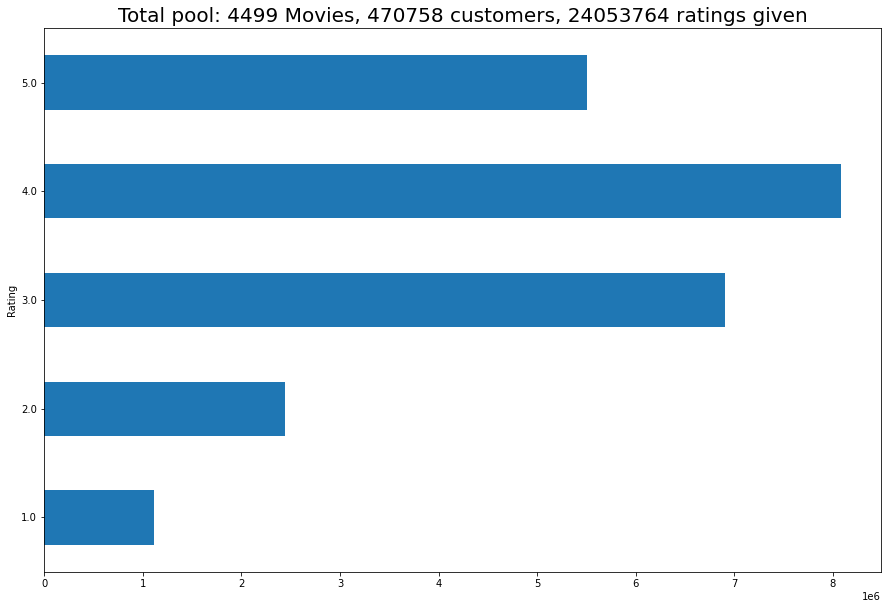

In [57]:
ax = p.plot(kind = 'barh', legend = False, figsize = (15,10))
plt.title(f'Total pool: {movie_count} Movies, {cust_count} customers, {rating_count} ratings given', fontsize=20)
#plt.axis('off')


#print--->print data  '' 'Total pool' 

In [58]:
# To count all the 'nan' values in the Ratings column in the 'ratings' dataset
df_nan = pd.DataFrame(pd.isnull(dataset.Rating))

df_nan.head()

,Rating
0,True
1,False
2,False
3,False
4,False


In [59]:
# To store the index of all the rows containing 'nan' values
df_nan = df_nan[df_nan['Rating'] == True]


df_nan.shape

(4499, 1)

In [60]:
# To reset the index of the dataframe
df_nan = df_nan.reset_index()



df_nan.head()

,index,Rating
0,0,True
1,548,True
2,694,True
3,2707,True
4,2850,True


In [61]:
df_nan['index'][1:]

1            548
2            694
3           2707
4           2850
5           3991
          ...   
4494    24046714
4495    24047329
4496    24056849
4497    24057564
4498    24057834
Name: index, Length: 4498, dtype: int64

In [62]:
df_nan['index'][:-1]

0              0
1            548
2            694
3           2707
4           2850
          ...   
4493    24046583
4494    24046714
4495    24047329
4496    24056849
4497    24057564
Name: index, Length: 4498, dtype: int64

In [63]:
x=zip(df_nan['index'][1:],df_nan['index'][:-1])
tuple(x)

((548, 0),
 (694, 548),
 (2707, 694),
 (2850, 2707),
 (3991, 2850),
 (5011, 3991),
 (5105, 5011),
 (20016, 5105),
 (20112, 20016),
 (20362, 20112),
 (20561, 20362),
 (21108, 20561),
 (21234, 21108),
 (21353, 21234),
 (21644, 21353),
 (24344, 21644),
 (31453, 24344),
 (42176, 31453),
 (42716, 42176),
 (42833, 42716),
 (43052, 42833),
 (43256, 43052),
 (43872, 43256),
 (45206, 43872),
 (46414, 45206),
 (52276, 46414),
 (52550, 52276),
 (92303, 52550),
 (92827, 92303),
 (211241, 92827),
 (211463, 211241),
 (213318, 211463),
 (220209, 213318),
 (220318, 220209),
 (221158, 220318),
 (222098, 221158),
 (222380, 222098),
 (223183, 222380),
 (223936, 223183),
 (224428, 223936),
 (224522, 224428),
 (224651, 224522),
 (224757, 224651),
 (233259, 224757),
 (235879, 233259),
 (242438, 235879),
 (244789, 242438),
 (248381, 244789),
 (248613, 248381),
 (248942, 248613),
 (249033, 248942),
 (254181, 249033),
 (254296, 254181),
 (254456, 254296),
 (256863, 254456),
 (258697, 256863),
 (262260, 258697)

In [64]:
#To create a numpy array containing movie ids according the 'ratings' dataset

movie_np = []
movie_id = 1
#into tuple
for i,j in zip(df_nan['index'][1:],df_nan['index'][:-1]):
    # numpy approach
    temp = np.full((1,i-j-1), movie_id)
    movie_np = np.append(movie_np, temp)
    movie_id += 1

# Account for last record and corresponding length
# numpy approach
last_record = np.full((1,len(dataset) - df_nan.iloc[-1, 0] - 1),movie_id)
movie_np = np.append(movie_np, last_record)

print(f'Movie numpy: {movie_np}')
print(f'Length: {len(movie_np)}')

Movie numpy: [1.000e+00 1.000e+00 1.000e+00 ... 4.499e+03 4.499e+03 4.499e+03]
Length: 24053764


In [65]:
i-j-1

269

In [66]:
i

24057834

In [67]:
j

24057564

In [68]:
df_nan.iloc[-1, 0] 

24057834

In [69]:
#To append the above created array to the datset after removing the 'nan' rows
dataset = dataset[pd.notnull(dataset['Rating'])]#movies count so nan
dataset['Movie_Id'] = movie_np.astype(int)
dataset['Cust_Id'] =dataset['Cust_Id'].astype(int)
print('-Dataset examples-')
dataset.head()

-Dataset examples-


,Cust_Id,Rating,Movie_Id
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
5,823519,3.0,1


In [70]:
dataset.shape

(24053764, 3)

In [71]:
dataset.tail()

,Cust_Id,Rating,Movie_Id
24058258,2591364,2.0,4499
24058259,1791000,2.0,4499
24058260,512536,5.0,4499
24058261,988963,3.0,4499
24058262,1704416,3.0,4499


In [72]:
dataset_movie_summary = dataset.groupby('Movie_Id')['Rating'].agg(["count"])
dataset_movie_summary

,count
Movie_Id,
1,547
2,145
3,2012
4,142
5,1140
...,...
4495,614
4496,9519
4497,714


In [73]:
movie_benchmark = round(dataset_movie_summary['count'].quantile(0.7),0)
movie_benchmark

1799.0

In [74]:
drop_movie_list = dataset_movie_summary[dataset_movie_summary['count'] < movie_benchmark].index
drop_movie_list

Index([   1,    2,    4,    5,    6,    7,    9,   10,   11,   12,
       ...
       4484, 4486, 4487, 4489, 4491, 4494, 4495, 4497, 4498, 4499],
      dtype='int32', name='Movie_Id', length=3149)

In [75]:
dataset_cust_summary = dataset.groupby('Cust_Id')['Rating'].agg(['count'])
dataset_cust_summary

,count
Cust_Id,
6,153
7,195
8,21
10,49
25,4
...,...
2649404,12
2649409,10
2649421,3


In [76]:
cust_benchmark = round(dataset_cust_summary['count'].quantile(0.7),0)
cust_benchmark

52.0

In [77]:
drop_cust_list = dataset_cust_summary[dataset_cust_summary['count'] < cust_benchmark].index
drop_cust_list

Index([      8,      10,      25,      33,      42,      59,      83,      87,
            94,     116,
       ...
       2649343, 2649351, 2649375, 2649376, 2649379, 2649384, 2649401, 2649404,
       2649409, 2649421],
      dtype='int32', name='Cust_Id', length=327300)

In [78]:
print(f'Original Shape: {dataset.shape}')

Original Shape: (24053764, 3)


In [79]:
# Remove movies with fewer ratings (from drop_movie_list)
dataset = dataset[~dataset['Movie_Id'].isin(drop_movie_list)]

# Remove inactive users (from drop_cust_list)
dataset = dataset[~dataset['Cust_Id'].isin(drop_cust_list)]

# Print the shape of the dataset after trimming
print('After Trim Shape: {}'.format(dataset.shape))

After Trim Shape: (17337458, 3)


In [80]:
dataset.head()

,Cust_Id,Rating,Movie_Id
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3


In [87]:

# Load the movie titles dataset with specified encoding and column names

df_title = pd.read_csv(
    r"C:\Users\Admin\Desktop\projects\movie_titles .csv",
    encoding="ISO-8859-1",  # Specify encoding to handle special characters
    header=None,  # No header in the file
    usecols=[0, 1, 2],  # Only read the first 3 columns
    names=['Movie_Id', 'Year', 'Name']  # Assign column names
)
df_title['Year'] = df_title['Year'].fillna(0).astype(int)  # Replace NaN with 0

# Set 'Movie_Id' as the index
df_title.set_index('Movie_Id', inplace=True)

# Print the first few rows to verify
print(df_title.head(10))

          Year                          Name
Movie_Id                                    
1         2003               Dinosaur Planet
2         2004    Isle of Man TT 2004 Review
3         1997                     Character
4         1994  Paula Abdul's Get Up & Dance
5         2004      The Rise and Fall of ECW
6         1997                          Sick
7         1992                         8 Man
8         2004    What the #$*! Do We Know!?
9         1991      Class of Nuke 'Em High 2
10        2001                       Fighter


In [88]:
# Import required libraries
import math

import matplotlib.pyplot as plt

from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

In [89]:
# Load Reader library
reader = Reader()

# get just top 100K rows for faster run time
data = Dataset.load_from_df(dataset[['Cust_Id', 'Movie_Id', 'Rating']][:100000], reader)

# Use the SVD algorithm.
svd = SVD()

# Compute the RMSE of the SVD algorithm
cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=3, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    1.0018  0.9950  0.9966  0.9978  0.0029  
MAE (testset)     0.8078  0.7990  0.7945  0.8004  0.0055  
Fit time          1.02    1.05    1.03    1.03    0.01    
Test time         1.81    1.72    0.17    1.23    0.75    


{'test_rmse': array([1.00175094, 0.99496824, 0.99662711]),
 'test_mae': array([0.80776134, 0.79897365, 0.79446364]),
 'fit_time': (1.0191948413848877, 1.0544366836547852, 1.0312073230743408),
 'test_time': (1.8124985694885254, 1.7191507816314697, 0.17187905311584473)}

In [90]:
dataset.head()

,Cust_Id,Rating,Movie_Id
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3


In [91]:
dataset_712664 = dataset[(dataset['Cust_Id'] == 712664) & (dataset['Rating'] == 5)]
dataset_712664 = dataset_712664.set_index('Movie_Id')
dataset_712664 = dataset_712664.join(df_title)['Name']
dataset_712664.head(10)

Movie_Id
3                              Character
79                           The Killing
175                       Reservoir Dogs
199                      The Deer Hunter
241                   North by Northwest
256    Ghost Dog: The Way of the Samurai
348        The Last Temptation of Christ
357                House of Sand and Fog
416                             Elephant
442                  Mississippi Burning
Name: Name, dtype: object

In [92]:
# Create a shallow copy for the movies dataset
user_712664 = df_title.copy()

user_712664 = user_712664.reset_index()

#To remove all the movies rated less often 
user_712664 = user_712664[~user_712664['Movie_Id'].isin(drop_movie_list)]


# getting full dataset
data = Dataset.load_from_df(dataset[['Cust_Id', 'Movie_Id', 'Rating']], reader)

#create a training set for svd
trainset = data.build_full_trainset()
svd.fit(trainset)

#Predict the ratings for user_712664
user_712664['Estimate_Score'] = user_712664['Movie_Id'].apply(lambda x: svd.predict(712664, x).est)

#Drop extra columns from the user_712664 data frame
user_712664 = user_712664.drop('Movie_Id', axis = 1)

# Sort predicted ratings for user_712664 in descending order
user_712664 = user_712664.sort_values('Estimate_Score', ascending=False)

#Print top 10 recommendations
print(user_712664.head(10))

      Year                                         Name  Estimate_Score
3927  2004                           Nip/Tuck: Season 2             5.0
3289  1974                                The Godfather             5.0
721   2003                           The Wire: Season 1             5.0
1847  1956     Samurai Trilogy 3: Duel at Ganryu Island             5.0
2101  1994                       The Simpsons: Season 6             5.0
3443  2004        Family Guy: Freakin' Sweet Collection             5.0
4359  1996                           Mr. Show: Season 2             5.0
3661  1994  House of Cards Trilogy II: To Play the King             5.0
4352  2002               Curb Your Enthusiasm: Season 3             5.0
174   1992                               Reservoir Dogs             5.0
